In [1]:
import pickle
import lzma
from pathlib import Path
from pprint import pprint
import os
import sys
from pympler import asizeof
from satisfying_sims.core import SimulationRecording
import matplotlib.pyplot as plt

In [2]:
project_root = Path(os.getcwd()).parent
results_path = project_root / "results"

In [3]:
exp_name = "new_years"
pkl_path = results_path / exp_name / "recording.pkl.xz"

In [4]:
rec = SimulationRecording.load(pkl_path)

In [6]:
for frame in rec.frames:
    if len(frame.events) > 0 and frame.t>3 and frame.t<5:
        pprint(frame.events)


[EventSnapshot(t=3.01999999999992,
               type='CollisionEvent',
               a_id=6,
               b_id=8,
               payload={'a_theme_id': 'sprite.fireball',
                        'b_theme_id': 'sprite.fireball',
                        'impulse': 77.514060774886,
                        'pos': [41.33629238434892, 10.578965118892766],
                        'relative_speed': 83.32144067297183,
                        'same_type': True}),
 EventSnapshot(t=3.01999999999992,
               type='SpawnEvent',
               a_id=10,
               b_id=None,
               payload={'reason': 'collision_spawn'})]
[EventSnapshot(t=3.129999999999908,
               type='HitWallEvent',
               a_id=7,
               b_id=None,
               payload={'body_theme_id': 'sprite.fireball',
                        'impulse': 80.55428140680593,
                        'norm_vec': [-1.0, 0.0]})]
[EventSnapshot(t=3.223333333333231,
               type='HitWallEvent',
     

In [ ]:
pprint(rec.body_static)
frame = rec.frames[0]
pprint(frame)

{0: BodyStaticSnapshot(id=0,
                       mass=1.0,
                       color=None,
                       collider=ColliderSnapshot(kind='CircleCollider',
                                                 attrs={'radius': 3.0}),
                       theme_id='sprite.fireball',
                       sprite_key='aligned',
                       tags={}),
 1: BodyStaticSnapshot(id=1,
                       mass=1.0,
                       color=None,
                       collider=ColliderSnapshot(kind='CircleCollider',
                                                 attrs={'radius': 3.0}),
                       theme_id='sprite.fireball',
                       sprite_key='aligned',
                       tags={}),
 2: BodyStaticSnapshot(id=2,
                       mass=1.0,
                       color=None,
                       collider=ColliderSnapshot(kind='CircleCollider',
                                                 attrs={'radius': 3.0}),
                

In [5]:
frame0 = rec.frames[0]
print(frame0.__dict__.keys())
print('number of frames: ', len(rec.frames))

dict_keys(['t', 'bodies', 'events', 'rates'])
number of frames:  22500


In [8]:
rec.frames[20000].events

[]

In [14]:
events = {'CollisionEvent': [], 'HitWallEvent': []}
for frame in rec.frames:
    for ev in frame.events:
        event_name = ev.type
        if event_name in events.keys():
            events[event_name].append(ev)


In [15]:
len(events['CollisionEvent']), len(events['HitWallEvent'])

(7145, 772)

In [20]:
wall_hit_impulses = [ev.payload['impulse'] for ev in events['HitWallEvent']]
collision_impulses = [ev.payload['impulse'] for ev in events['CollisionEvent']]

(array([ 55., 114., 123.,  93., 103.,  94.,  70.,  39.,  28.,  17.,  14.,
         11.,   6.,   0.,   2.,   2.,   0.,   0.,   0.,   1.]),
 array([  3.46861819,  23.13039689,  42.79217558,  62.45395427,
         82.11573296, 101.77751165, 121.43929035, 141.10106904,
        160.76284773, 180.42462642, 200.08640511, 219.74818381,
        239.4099625 , 259.07174119, 278.73351988, 298.39529857,
        318.05707726, 337.71885596, 357.38063465, 377.04241334,
        396.70419203]),
 <BarContainer object of 20 artists>)

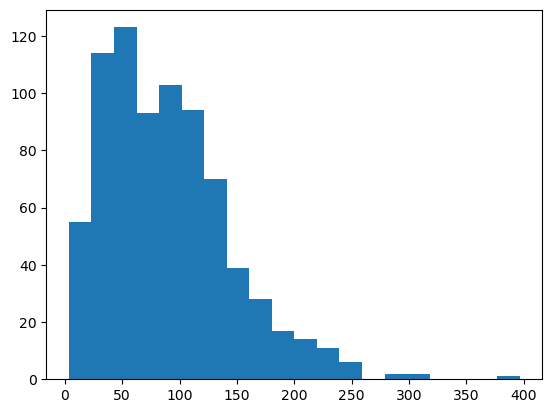

In [30]:
plt.hist(wall_hit_impulses, bins=20)


(array([166., 442., 605., 710., 798., 787., 711., 607., 523., 442., 328.,
        293., 225., 166., 113.,  80.,  48.,  22.,  24.,  17.,  11.,   3.,
          9.,   5.,   2.,   3.,   1.,   0.,   0.,   4.]),
 array([4.92178013e-02, 9.45240721e+00, 1.88555966e+01, 2.82587860e+01,
        3.76619754e+01, 4.70651648e+01, 5.64683543e+01, 6.58715437e+01,
        7.52747331e+01, 8.46779225e+01, 9.40811119e+01, 1.03484301e+02,
        1.12887491e+02, 1.22290680e+02, 1.31693870e+02, 1.41097059e+02,
        1.50500248e+02, 1.59903438e+02, 1.69306627e+02, 1.78709817e+02,
        1.88113006e+02, 1.97516195e+02, 2.06919385e+02, 2.16322574e+02,
        2.25725764e+02, 2.35128953e+02, 2.44532142e+02, 2.53935332e+02,
        2.63338521e+02, 2.72741711e+02, 2.82144900e+02]),
 <BarContainer object of 30 artists>)

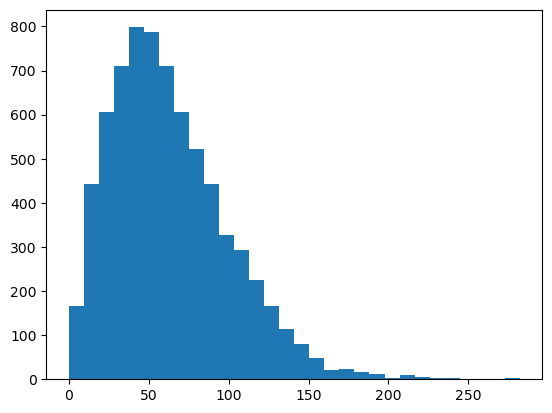

In [26]:
plt.hist(collision_impulses, bins=30)

In [21]:
print(f'size of whole recording: ', asizeof.asizeof(rec), "bytes")

size of whole recording:  83643352 bytes


In [19]:
i = 12000
    
print(f'size of frame {i}: ', asizeof.asizeof(rec.frames[i]), "bytes")

size of frame 12000:  11032 bytes


In [18]:
print(rec.frames[-1])

FrameSnapshot(t=22.99999999999532, bodies={0: BodyStateSnapshot(pos=(48.26453106432118, 54.28463313319459), vel=(-59.940726579374314, 10.195301131575786)), 1: BodyStateSnapshot(pos=(55.17429201641276, 96.83902414456405), vel=(-6.307057465986372, -10.572184002204516)), 2: BodyStateSnapshot(pos=(55.692051768489975, 28.50125143915944), vel=(9.848621403012107, -1.2541362153180433)), 3: BodyStateSnapshot(pos=(13.843514188521041, 9.94546733375674), vel=(3.8187395503704487, -27.530353321721805)), 4: BodyStateSnapshot(pos=(78.07864381041392, 94.79016383979506), vel=(-0.6540833086902191, 4.935089551071714)), 5: BodyStateSnapshot(pos=(79.94104224424593, 24.691318523479456), vel=(-26.509469122470023, 6.430411044774981)), 6: BodyStateSnapshot(pos=(80.30575844156688, 11.354596578818361), vel=(-17.33758445756991, -9.523948041139462)), 7: BodyStateSnapshot(pos=(95.92549651041443, 17.694045251968376), vel=(-3.743494359626932, -11.136385891813385)), 8: BodyStateSnapshot(pos=(31.01803807527336, 69.82371

In [8]:
import sys
import dataclasses
from collections.abc import Mapping, Sequence
import numpy as np

def _iter_children(obj):
    """Yield (name, child) pairs for container-like objects."""
    if isinstance(obj, Mapping):
        for k, v in obj.items():
            yield f"[{k!r}]", v
    elif isinstance(obj, (list, tuple, set, frozenset)):
        for i, v in enumerate(obj):
            yield f"[{i}]", v
    elif dataclasses.is_dataclass(obj):
        for f in dataclasses.fields(obj):
            yield f".{f.name}", getattr(obj, f.name)
    elif hasattr(obj, "__dict__"):
        for k, v in obj.__dict__.items():
            yield f".{k}", v


def size_tree(obj, *, name="root", _seen=None):
    """
    Build a full size tree for `obj`.

    Returns a dict with:
      - name: path string
      - type: type name
      - size: shallow size (bytes)
      - total: size + all descendants (bytes, no double-count)
      - children: list of child nodes
    """
    if _seen is None:
        _seen = set()

    oid = id(obj)
    if oid in _seen:
        # Already counted: avoid double-counting in totals
        return {
            "name": name,
            "type": type(obj).__name__,
            "size": 0,
            "total": 0,
            "children": [],
            "note": "shared object (already seen)",
        }
    _seen.add(oid)

    size = sys.getsizeof(obj)

    # Include numpy buffer explicitly
    if isinstance(obj, np.ndarray):
        size += obj.nbytes

    node = {
        "name": name,
        "type": type(obj).__name__,
        "size": size,
        "total": size,
        "children": [],
    }

    for child_name, child in _iter_children(obj):
        child_node = size_tree(
            child,
            name=name + child_name,
            _seen=_seen,
        )
        node["children"].append(child_node)
        node["total"] += child_node["total"]

    return node


def print_size_tree(node, depth=0, *, max_depth=None, min_bytes=0):
    """
    Pretty-print the size tree.

    - max_depth: only *show* nodes up to this depth (root = 0).
                 Totals are still computed from the full tree.
    - min_bytes: only show nodes with total >= min_bytes.
    """
    if node["total"] < min_bytes:
        return
    if max_depth is not None and depth > max_depth:
        return

    indent_str = "  " * depth
    line = (
        f"{indent_str}{node['name']}  "
        f"({node['type']}): size={node['size']} B, total={node['total']} B"
    )
    note = node.get("note")
    if note:
        line += f"  [{note}]"
    print(line)

    for child in node["children"]:
        print_size_tree(child, depth + 1, max_depth=max_depth, min_bytes=min_bytes)


In [9]:
def show_size_tree(frames, frame_num, max_depth=0, min_bytes=0):
    frame = frames[frame_num]
    tree = size_tree(frame)  # tweak depth as needed
    print_size_tree(tree, min_bytes=min_bytes, max_depth=max_depth) # only show nodes ≥ min_bytes

In [10]:
show_size_tree(rec.frames, frame_num=0, max_depth=4, min_bytes=0)

root  (FrameSnapshot): size=48 B, total=864 B
  root.t  (float): size=24 B, total=24 B
  root.bodies  (dict): size=224 B, total=736 B
    root.bodies[0]  (BodyStateSnapshot): size=48 B, total=256 B
      root.bodies[0].pos  (tuple): size=56 B, total=104 B
        root.bodies[0].pos[0]  (float): size=24 B, total=24 B
        root.bodies[0].pos[1]  (float): size=24 B, total=24 B
      root.bodies[0].vel  (tuple): size=56 B, total=104 B
        root.bodies[0].vel[0]  (float): size=24 B, total=24 B
        root.bodies[0].vel[1]  (float): size=24 B, total=24 B
    root.bodies[1]  (BodyStateSnapshot): size=48 B, total=256 B
      root.bodies[1].pos  (tuple): size=56 B, total=104 B
        root.bodies[1].pos[0]  (float): size=24 B, total=24 B
        root.bodies[1].pos[1]  (float): size=24 B, total=24 B
      root.bodies[1].vel  (tuple): size=56 B, total=104 B
        root.bodies[1].vel[0]  (float): size=24 B, total=24 B
        root.bodies[1].vel[1]  (float): size=24 B, total=24 B
  root.eve